# Team members

| Id        | Student                                 |
|-----------|-----------------------------------------|
| A01795654 | Raul Astorga Castro                     |
| A01795579 | Edson Misael Astorga Castro             |
| A01373679 | Luis Miguel Balderas González de Burgos |
| A01730466 | Sinaí Avalos Rivera                     |
| A01410682 | Carlos Miguel Arvizu Durán              |

# TC 5033
## Deep Learning
## Transfer Learning

<br>

#### Activity 2c: Exploring Transfer Learning with CIFAR-10
<br>

- Objective:

    In this activity, you'll study the concept of Transfer Learning, a powerful technique to improve the performance of your models by leveraging pre-trained architectures. The provided notebook offers a complete solution using a specific pre-trained model on the CIFAR-10 dataset. Your task is to extend this by trying out two other pre-trained models.
    
- Instructions:

    This activity should be submitted in the same format as previous activities. Remember to include the names of all team members in a markdown cell at the beginning of the notebook. The grade obtained in this notebook will be averaged with that of Activity 2b, for the grade of Activity 2.    

    Study the Provided Code: The provided notebook has a complete Transfer Learning solution using a particular pre-trained model. Make sure you understand the flow of the code and the role of each component.

    Select Two Other Pre-trained Models: Choose two different pre-trained models available in PyTorch's model zoo.

    Apply Transfer Learning: Add cells to implement Transfer Learning using the two models you've chosen. Train these models on the CIFAR-10 dataset.

    Evaluation: After training, evaluate your models' performance. Compare the results with the provided solution and try to interpret why there might be differences.

    Documentation: In a markdown cell, summarize your findings. Include any challenges you faced, how you overcame them, and any interesting insights you gained from comparing the different pre-trained models.

- Note:

    Although the provided code serves as a guide, you're encouraged to implement the new solutions on your own. The goal is to reinforce your understanding of Transfer Learning and how to apply it effectively.




## Import files and libraries required for the model training

### Libraries

In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
from torchvision import models
import matplotlib.pyplot as plt

### Download Cifar10 dataset

In [8]:
# Path where the datasets will be downloaded
DATA_PATH = '/content/'

# Number of elements(images) contained in the training dataset
NUM_TRAIN = 45000

# Size of the minibatches
MINIBATCH_SIZE = 64

# Transformations:
# - Resize every image to 224x224
# - Convert to tensor
# - Normalize providing the mean and standard deviation of each channel
transform_cifar = T.Compose([
                T.Resize(224),
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
            ])

# Training set loader
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_cifar)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

# Validation set loader
cifar10_val = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                           transform=transform_cifar)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, len(cifar10_val))))

# Testing set loader
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [9]:
# Printing the x and y shape of each minibatch just to validate that everything is ok
for i, (x, y) in enumerate(val_loader):
    # i represents the number of iteration
    # x has a shale with 4 elements, first indicates the quantity of images, second the 
    # number of channels of each image and last two
    # indicates the number of pixels
    # y has a shape that only indicates the numbers images that would be on x
    print(i, x.shape, y.shape)

0 torch.Size([64, 3, 224, 224]) torch.Size([64])
1 torch.Size([64, 3, 224, 224]) torch.Size([64])
2 torch.Size([64, 3, 224, 224]) torch.Size([64])
3 torch.Size([64, 3, 224, 224]) torch.Size([64])
4 torch.Size([64, 3, 224, 224]) torch.Size([64])
5 torch.Size([64, 3, 224, 224]) torch.Size([64])
6 torch.Size([64, 3, 224, 224]) torch.Size([64])
7 torch.Size([64, 3, 224, 224]) torch.Size([64])
8 torch.Size([64, 3, 224, 224]) torch.Size([64])
9 torch.Size([64, 3, 224, 224]) torch.Size([64])
10 torch.Size([64, 3, 224, 224]) torch.Size([64])
11 torch.Size([64, 3, 224, 224]) torch.Size([64])
12 torch.Size([64, 3, 224, 224]) torch.Size([64])
13 torch.Size([64, 3, 224, 224]) torch.Size([64])
14 torch.Size([64, 3, 224, 224]) torch.Size([64])
15 torch.Size([64, 3, 224, 224]) torch.Size([64])
16 torch.Size([64, 3, 224, 224]) torch.Size([64])
17 torch.Size([64, 3, 224, 224]) torch.Size([64])
18 torch.Size([64, 3, 224, 224]) torch.Size([64])
19 torch.Size([64, 3, 224, 224]) torch.Size([64])
20 torch.S

## Using GPU

In [16]:
if torch.cuda.is_available():
    device = torch.device('cuda') # GPU will be used if available
elif torch.backends.mps.is_available():
    device = torch.device('mps') # GPU will be used in Apple Silicon Macs if available
else:
    device = torch.device('cpu') # CPU will be used if GPU is not available
print(device)

cuda


## Plot samples

The sampled image represents a: Cat


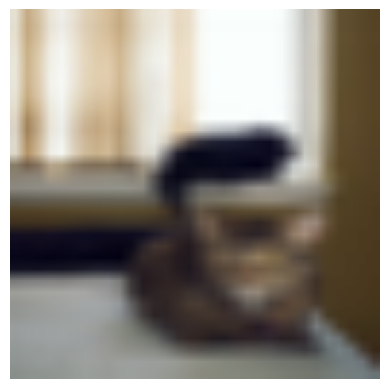

In [19]:
# Create an array with the name of the different classes (in string)
# Each one of these classes are going to be output of the CNN
classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer','Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Function to print images on screen
def plot_figure(image):
    plt.imshow(image.permute(1,2,0))
    plt.axis('off')
    plt.show()

# A random index is generated on the full size of the test dataset
rnd_sample_idx = np.random.randint(len(test_loader))

# Takes the index and prints the string class that represents that index
print(f'The sampled image represents a: {classes[test_loader.dataset[rnd_sample_idx][1]]}')

# Extract the image from the test dataset that corresponds to the previously generated index
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )

# Print the image on the screen
plot_figure(image)

## Calculate Accuracy

In [22]:
def accuracy(model, loader):
    """
    Calculates the accuracy of the model depending of the loader (train, test, validation)

    Args:
    model: Feature set
    loader: Dataset with features and labels

    Returns:
    float: Model accuracy
    """
    num_correct = 0 #First we intialize the variables
    num_total = 0
    model.eval() # This function set the model on evaluation, then it will not compute the gradiants of the parameters
    model = model.to(device=device) # The model is charged on the device
    with torch.no_grad(): 
        for (xi, yi) in loader:
            xi = xi.to(device=device, dtype = torch.float32) # Each image and correct class of the image is charged on the GPU
            yi = yi.to(device=device, dtype = torch.long)
            scores = model(xi) # mb_size, 10 With this function all the model runs and calculates its scores
            _, pred = scores.max(dim=1) #pred shape (mb_size ) 
            num_correct += (pred == yi).sum() # pred shape (mb_size), yi shape (mb_size, 1)
            num_total += pred.size(0)
        return float(num_correct)/num_total



## Training loop

In [25]:
def train(model, optimiser, epochs=100):
    """
    Train the model using the previously defined layers

    Args:
    model (Sequential_layers): The model to train
    optimiser: Predefined and parameterized optimization function
    epochs (int): Number of training epochs
    """
    model = model.to(device=device) # With this function we charge the model on the device, on the gpu
    for epoch in range(epochs):
        for i, (xi, yi) in enumerate(train_loader):
            model.train() # Now we set the model on train mode, then it computes the gradiants
            xi = xi.to(device=device, dtype=torch.float32) 
            yi = yi.to(device=device, dtype=torch.long)
            scores = model(xi) #Once we charge the images on the GPU the model computes all the variables on the NN

            cost = F.cross_entropy(input= scores, target=yi) #And with this we get the probability precisión of the calculus

            optimiser.zero_grad() # This lines cleans the old gradiants calculated
            cost.backward() # Then we compute the gradiants of the loss
            optimiser.step() # Then we perform the update of the nn

        acc = accuracy(model, val_loader) 
        print(f'Epoch: {epoch}, cost: {cost.item()}, accuracy: {acc},')

## Load Pre-trained Model

### ResNet18

In [41]:
# Load ResNet18 pretrianed from torchvision
model_resnet18 = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1) # We call the model to use that is proved has a good performance

#### Exploring the model

In [44]:
# Printing the default weights of resnet18
for i, w in enumerate(model_resnet18.parameters()):
    print(i, w.shape, w.requires_grad) #We make sure that the parameters are good to sync with our dataset

0 torch.Size([64, 3, 7, 7]) True
1 torch.Size([64]) True
2 torch.Size([64]) True
3 torch.Size([64, 64, 3, 3]) True
4 torch.Size([64]) True
5 torch.Size([64]) True
6 torch.Size([64, 64, 3, 3]) True
7 torch.Size([64]) True
8 torch.Size([64]) True
9 torch.Size([64, 64, 3, 3]) True
10 torch.Size([64]) True
11 torch.Size([64]) True
12 torch.Size([64, 64, 3, 3]) True
13 torch.Size([64]) True
14 torch.Size([64]) True
15 torch.Size([128, 64, 3, 3]) True
16 torch.Size([128]) True
17 torch.Size([128]) True
18 torch.Size([128, 128, 3, 3]) True
19 torch.Size([128]) True
20 torch.Size([128]) True
21 torch.Size([128, 64, 1, 1]) True
22 torch.Size([128]) True
23 torch.Size([128]) True
24 torch.Size([128, 128, 3, 3]) True
25 torch.Size([128]) True
26 torch.Size([128]) True
27 torch.Size([128, 128, 3, 3]) True
28 torch.Size([128]) True
29 torch.Size([128]) True
30 torch.Size([256, 128, 3, 3]) True
31 torch.Size([256]) True
32 torch.Size([256]) True
33 torch.Size([256, 256, 3, 3]) True
34 torch.Size([25

In [46]:
# Printing the different layers that are part of resnet18
model_resnet18 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

#### Adjust to our model

In [49]:
# Extracting the layers that are part of resnet18 originally and integrating into a Sequential class
model_aux = nn.Sequential(*list(model_resnet18.children()))

# Printing the above Sequential class which is identical to the resnet18 pretrained model
# just for validation
model_aux

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [51]:
# Re-extracting all layers that are part of resnet18 except for the last Fully Connect layer
model_aux = nn.Sequential(*list(model_resnet18.children())[:-1])

In [53]:
# Printing for validate the Sequential class without the last FC layer
model_aux

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [55]:
# Locking all parameters so that they do not have to be retrained
# and avoiding making training more expensive in resources
for i, parameter in enumerate(model_aux.parameters()):
    parameter.requires_grad = False

In [57]:
# Printing (again) the default weights of resnet18 with requires_grad in False.
for i, parameter in enumerate(model_aux.parameters()):
    print(i, parameter.requires_grad)   # This false indicates that this leyers are frozen,
                                        # they are not going to be modified on our train

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False


#### Train model

In [60]:
# Learning rate
lr = 5e-4

# Number of epochs
epochs = 3

# The resnet18 model is declared with the original layers plus the layers we need for our case
# 512 in features from the last layer of model_aux, and 10 out features (classes)
model1 = nn.Sequential(model_aux,
                       nn.Flatten(), #Flatten layer creates a vector from all the pixels we have
                       nn.Linear(in_features=512, out_features= 10, bias= True)) # We perform an FC layer to create the outputs

# Using Adam as optimization function
optimiser = torch.optim.Adam(model1.parameters(), lr=lr, betas=(0.9, 0.999))    # optimizer will change 
                                                                                # the values only on out last FC layer

In [62]:
# Printing final resnet18 model with all layers
model1

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [64]:
print('Start training...')
train(model1, optimiser, epochs)

Start training...
Epoch: 0, cost: 0.818694531917572, accuracy: 0.7738,
Epoch: 1, cost: 0.7382544875144958, accuracy: 0.79,
Epoch: 2, cost: 0.23051898181438446, accuracy: 0.7986,


### Resnet50

In [65]:
# Load pretrained model
model_resnet50 = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1) # This model is proved that has a good performance

# Adjust to our model
model_aux2 = nn.Sequential(*list(model_resnet50.children())[:-1]) #we remove the last layer to only have 10 output layers
for i, parameter in enumerate(model_aux2.parameters()):
    parameter.requires_grad = False

# Learning rate
lr = 5e-4

# Number of epochs
epochs = 3

# The resnet50 model is declared with the original layers plus the layers we need for our case
# 2048 in features from the last layer of model_aux2, and 10 out features (classes)
model2 = nn.Sequential(model_aux2,
                       nn.Flatten(), #as the previous model, we create a vector of pixels
                       nn.Linear(in_features=2048, out_features= 10, bias= True)) # and create a FC layer at the end

# Using Adam as optimization function
optimiser = torch.optim.Adam(model2.parameters(), lr=lr, betas=(0.9, 0.999))

print('Start training...')
train(model2, optimiser, epochs)

Start training...
Epoch: 0, cost: 1.006422996520996, accuracy: 0.792,
Epoch: 1, cost: 0.5532893538475037, accuracy: 0.8008,
Epoch: 2, cost: 0.6747536659240723, accuracy: 0.807,


### AlexNet

In [67]:
# Load pretrained model
model_alexnet = models.alexnet(weights='DEFAULT') # This model is proved that has a good performance

# Adjust to our model
model_aux3 = nn.Sequential(*list(model_alexnet.children())[:-1]) #we remove the last layer to only have 10 output layers
for i, parameter in enumerate(model_aux3.parameters()):
    parameter.requires_grad = False

# Learning rate
lr = 5e-4

# Number of epochs
epochs = 3

# The alexnet model is declared with the original layers plus the layers we need for our case
# 9216 in features from the last layer of model_aux3, and 10 out features (classes)
model3 = nn.Sequential(model_aux3,
                       nn.Flatten(),
                       nn.Linear(in_features=9216, out_features= 10, bias= True))

# Using Adam as optimization function
optimiser = torch.optim.Adam(model3.parameters(), lr=lr, betas=(0.9, 0.999))

print('Start training...')
train(model3, optimiser, epochs)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\edson/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth
100%|███████████████████████████████████████████████████████████████████████████████| 233M/233M [00:23<00:00, 10.5MB/s]


Start training...
Epoch: 0, cost: 0.4040079712867737, accuracy: 0.8188,
Epoch: 1, cost: 0.2453603446483612, accuracy: 0.8386,
Epoch: 2, cost: 0.17641042172908783, accuracy: 0.8212,


## Accuracies

In [69]:
#ResNet18
accuracy(model1, test_loader)

0.7935

In [70]:
#ResNet50
accuracy(model2, test_loader)

0.8029

In [71]:
#AlexNet
accuracy(model3, test_loader)

0.8198